In [56]:
import gensim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df  = pd.read_csv('./music/tcc_ceds_music.csv')

In [20]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [27]:
df.shape

(28372, 31)

In [28]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,42946.323558,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,24749.325492,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,20391.250000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,45405.500000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,64090.500000,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

<AxesSubplot: xlabel='release_date', ylabel='Count'>

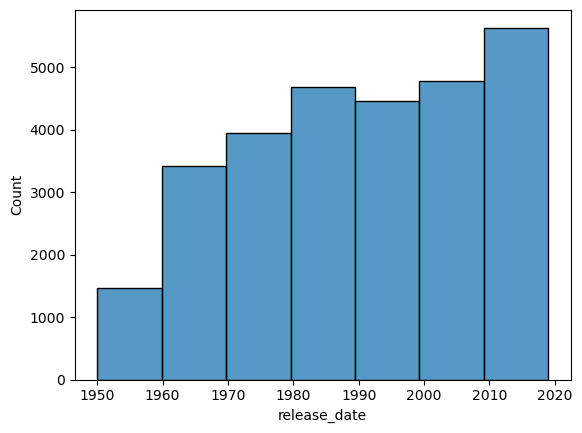

In [68]:
sns.histplot(data=df, x='release_date', bins=7)

<AxesSubplot: xlabel='len', ylabel='Count'>

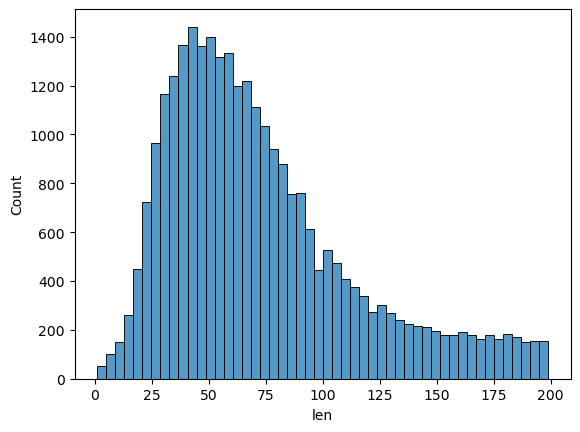

In [66]:
sns.histplot(data=df, x='len', bins=50)

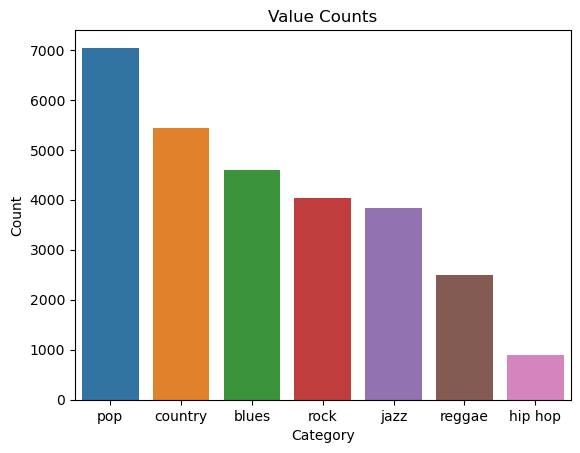

In [61]:

# Get value counts of the 'Category' column
genre = df['genre'].value_counts()

# Plot the counts using Seaborn
sns.barplot(x=genre.index, y=genre.values)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

In [62]:
#df['topic'].value_counts()

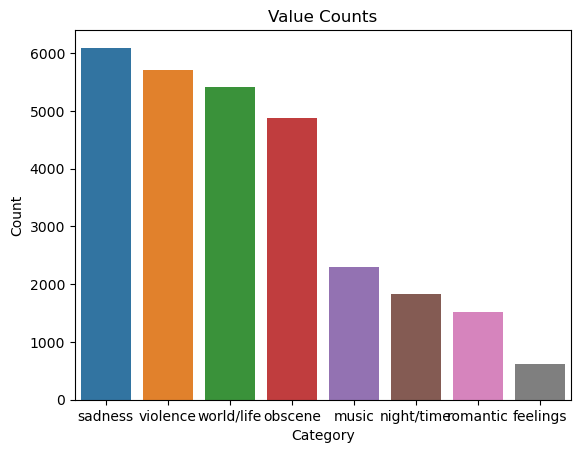

In [59]:

# Get value counts of the 'Category' column
topic = df['topic'].value_counts()

# Plot the counts using Seaborn
sns.barplot(x=topic.index, y=topic.values)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()


In [63]:
lyric = df.loc[1, 'lyrics']
print(lyric)

believe drop rain fall grow believe darkest night candle glow believe go astray come believe believe believe smallest prayer hear believe great hear word time hear bear baby touch leaf believe believe believe lord heaven guide sin hide believe calvary die pierce believe death rise meet heaven loud amen know believe
